# Adult census to predict Income

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the data sets 


In [2]:

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
df1 = pd.read_csv("F:\data\\adult.csv")


## Data Exploration

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df1.shape

(48842, 15)

In [6]:
df1= df1.replace('?',np.nan).dropna()


In [7]:
df1.shape

(45222, 15)

In [8]:
df1.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


## Data visualization

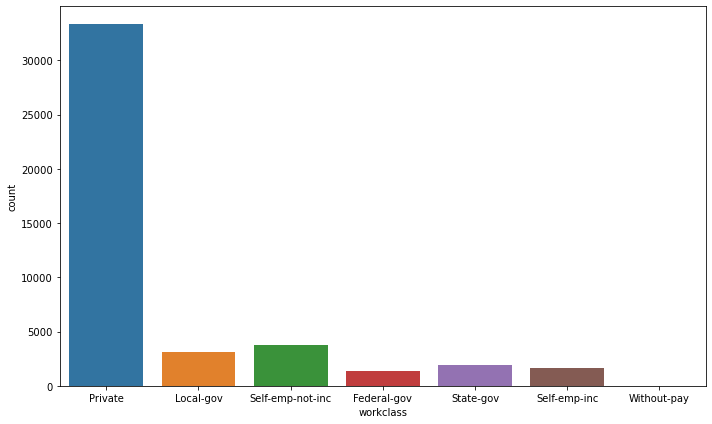

In [9]:
fig = plt.figure(figsize=(10,6))

sns.countplot('workclass', data=df1)
plt.tight_layout()
plt.show()

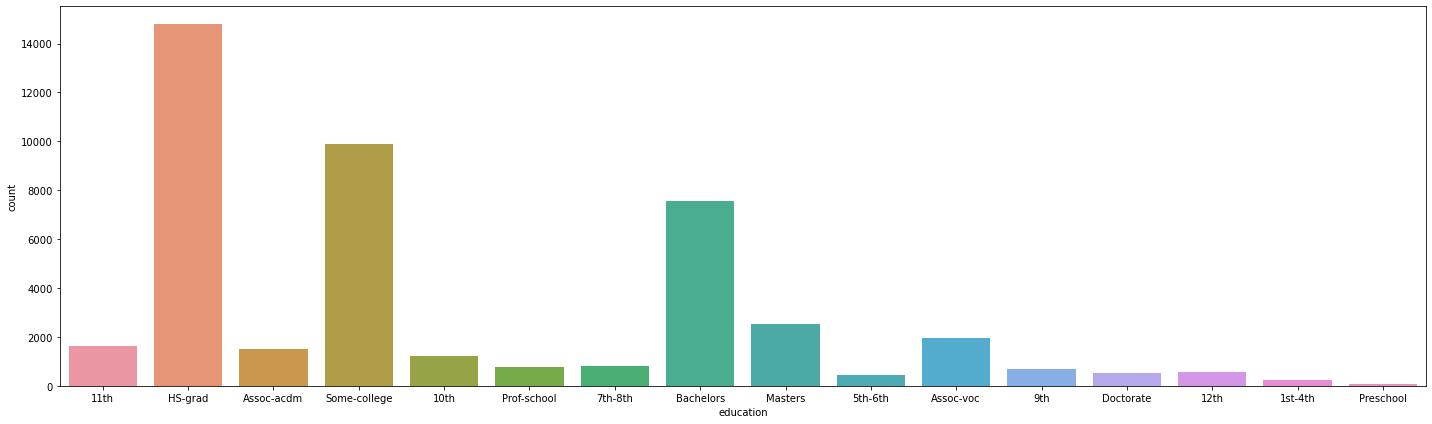

In [10]:
fig = plt.figure(figsize=(20,6))

sns.countplot('education', data=df1)
plt.tight_layout()
plt.show()



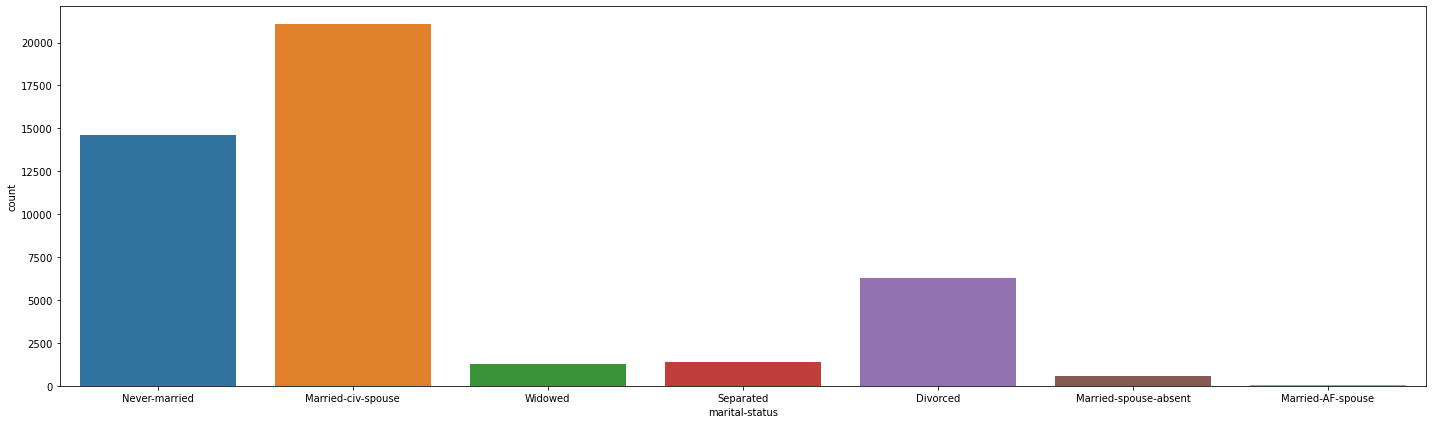

In [11]:
fig = plt.figure(figsize=(20,6))

sns.countplot('marital-status', data=df1)
plt.tight_layout()
plt.show()

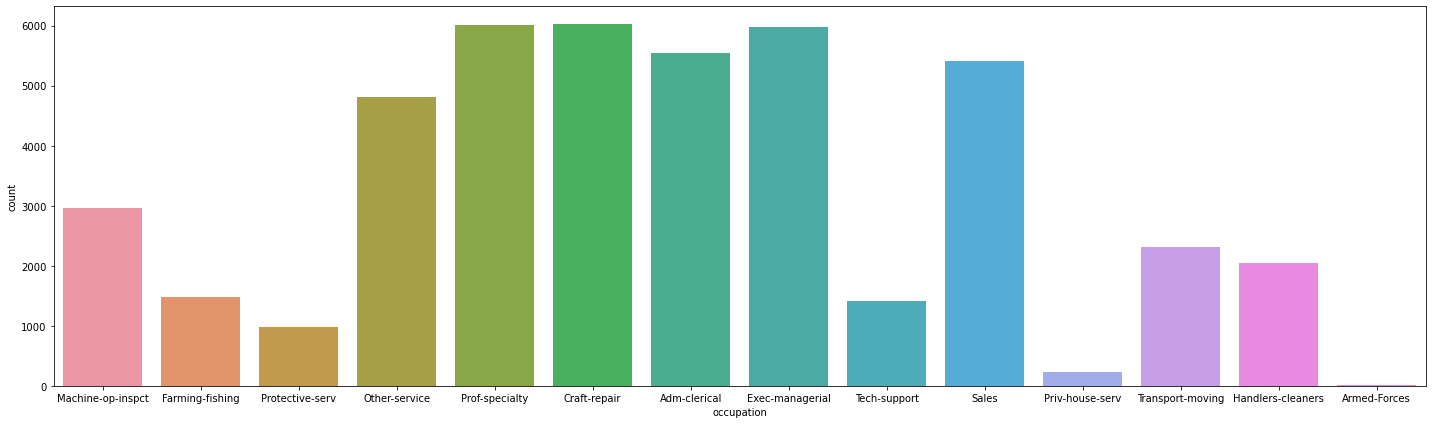

In [12]:
fig = plt.figure(figsize=(20,6))

sns.countplot('occupation', data=df1)
plt.tight_layout()
plt.show()

In [13]:
df1["income"] = df1["income"].map({'>50K':1 ,'<=50K':0})

In [14]:
df1['income'].unique()

array([0, 1], dtype=int64)

In [15]:
df1.head ()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.8+ MB


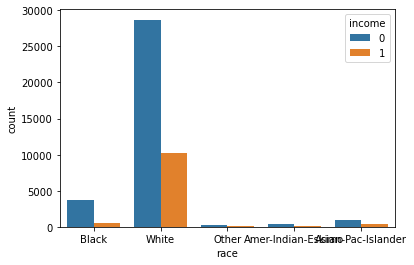

In [17]:
sns.countplot(data=df1,x='race',hue='income')

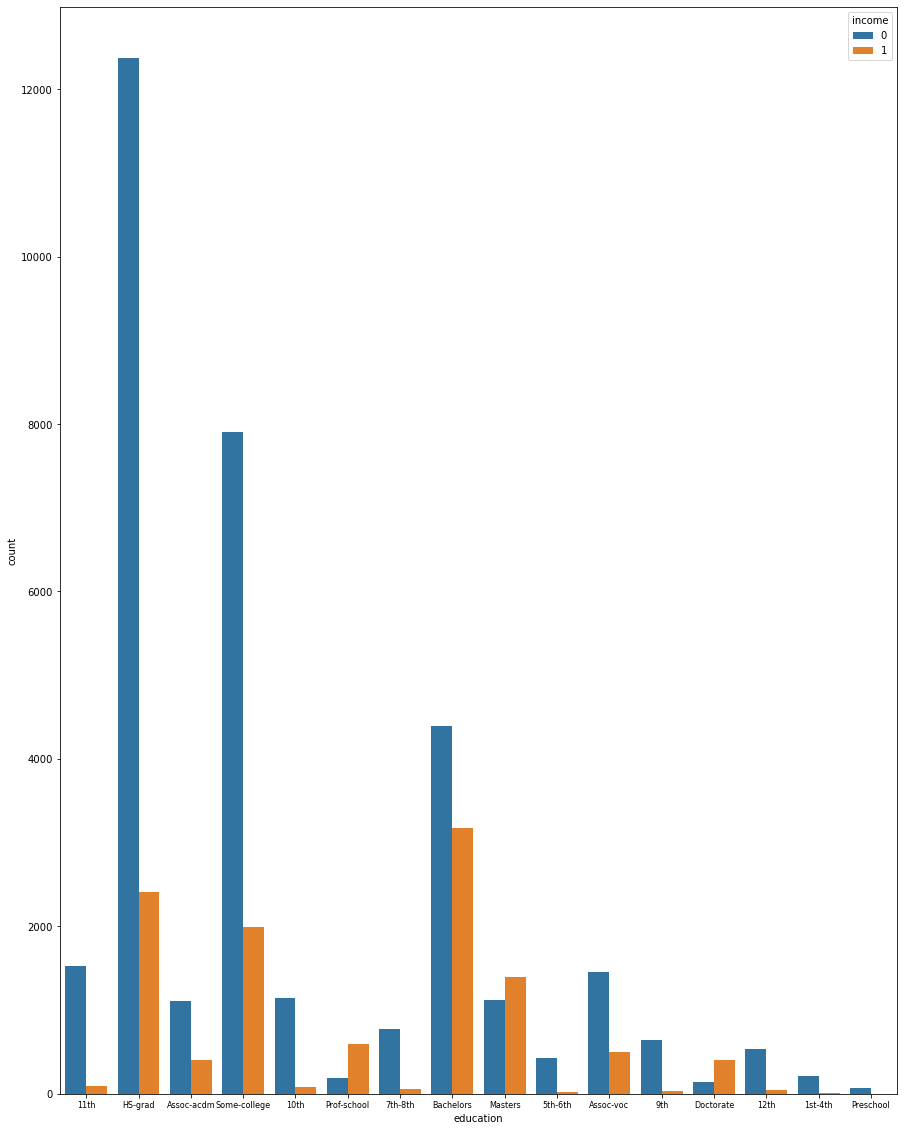

In [18]:

fig = plt.figure(figsize=(15,20))
plt.xticks(fontsize=8)
sns.countplot(data=df1,x='education',hue='income')
plt.show()


In [19]:
df1['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [20]:
df1.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
df1['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [22]:
df1= df1.replace('?',np.nan)
df1['workclass'].value_counts()


Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [23]:
df1.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [24]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [25]:
df1.drop(['fnlwgt'],axis=1,inplace=True)

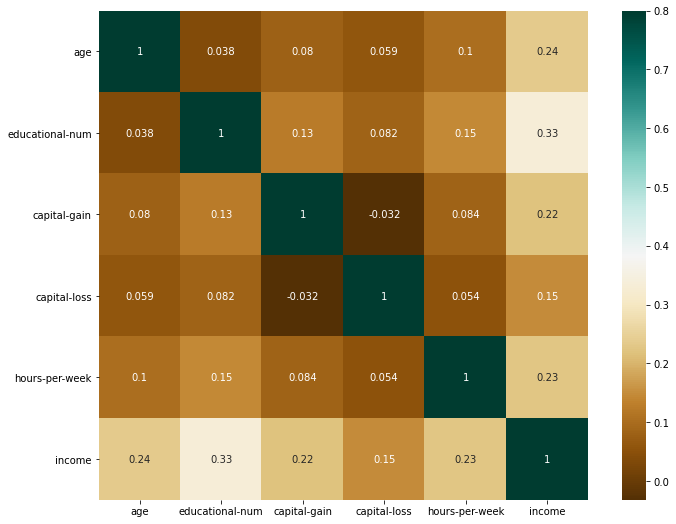

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
temp= df1

hmap = temp.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

## Data Cleaning

In [27]:
df1.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [28]:
df2=df1.copy()

# #Fit scaler on train data only. Transform training and testing set

In [29]:
numerical_col = ["age", 'educational-num','capital-gain','capital-loss', "hours-per-week"]
from sklearn.preprocessing import StandardScaler
mini=StandardScaler()
Xnum=df1[numerical_col]
ynum=df1['income']

In [30]:

from sklearn.feature_selection import SelectKBest,chi2
feature= SelectKBest(score_func=chi2,k=5)
feature_score=feature. fit(Xnum,ynum)
scores=feature_score.scores_

In [31]:
Xnum.shape

(45222, 5)

In [32]:
best=pd.DataFrame(scores,columns=['score'])
best

,score
0,1.151612e+04
1,3.225918e+03
2,1.130232e+08
3,1.850507e+06
4,8.221149e+03


In [33]:
fea=pd.DataFrame(Xnum.columns,columns=['feature'])
best_score=pd.concat([fea,best],axis=1)
best_score

,feature,score
0,age,1.151612e+04
1,educational-num,3.225918e+03
2,capital-gain,1.130232e+08
3,capital-loss,1.850507e+06
4,hours-per-week,8.221149e+03


In [34]:
best_score.nlargest(24,'score')

,feature,score
2,capital-gain,1.130232e+08
3,capital-loss,1.850507e+06
0,age,1.151612e+04
4,hours-per-week,8.221149e+03
1,educational-num,3.225918e+03


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [36]:
df2.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [37]:
df2.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [38]:

X_min=df2[['age','educational-num','capital-loss','hours-per-week','capital-loss']].copy()

In [39]:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender'] 

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender']

In [40]:
x_min=mini.fit_transform(X_min)

In [41]:
x_min

array([[-1.02498291, -1.22155881, -0.21878026, -0.07812006, -0.21878026],
       [-0.04145504, -0.43812161, -0.21878026,  0.7547014 , -0.21878026],
       [-0.79801494,  0.73703421, -0.21878026, -0.07812006, -0.21878026],
       ...,
       [ 1.47166476, -0.43812161, -0.21878026, -0.07812006, -0.21878026],
       [-1.25195088, -0.43812161, -0.21878026, -1.74376299, -0.21878026],
       [ 1.01772882, -0.43812161, -0.21878026, -0.07812006, -0.21878026]])

In [42]:
df3=pd.DataFrame(x_min,columns=['ageN','educational-numN','capital-lossN','hours-per-weekN','capital-lossN'])

In [43]:
df_c=df2[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender']].copy()

In [44]:
df_oneh = pd.get_dummies(df_c,drop_first=True)
df_oneh

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
48838,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
48839,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [45]:
df2.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [46]:
df2.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender'] ,axis=1,inplace=True)

In [47]:
df_fin=pd.concat([df2,df_oneh],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X=df_fin.drop(['income','native-country'],axis=1)
y=df_fin['income'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
re=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
dc=DecisionTreeClassifier()
ke=KNeighborsClassifier()
sv=SVC()


In [50]:
maxscore=0
lst=[ran,de,sv,knn]
for i in lst:
    for j in range(42,101):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=j)
        i.fit(X_train,y_train)
        sco=i.score(X_test,y_test)
        if sco>maxscore:
            maxscore=sco
            best_state=j
            best_clas= i
print()
print()
print(maxscore,best_state,best_clas)
            

NameError: name 'ran' is not defined

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
    
grid_values = {'learning_rate': np.arange(0.01, 1.1, 0.25), 'max_depth': np.arange(2,6,1)}
clf = GradientBoostingClassifier()
grid_gbdc = GridSearchCV(clf, param_grid = grid_values)
grid_gbdc.fit(X_train, y_train)
grid_gbdc.best_estimator_.score(X_train, y_train)
print('Best Parameters: {}'.format(grid_gbdc.best_params_))
print('Train Score: {:.2f}'.format(grid_gbdc.best_estimator_.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(grid_gbdc.best_estimator_.score(X_test, y_test)))
    